In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import glob
import pickle
import pandas as pd

In [4]:
import sys
sys.path.append('../..')
from loaders import load_sabes
from segmentation import reach_segment_sabes

In [5]:
dpath = '/mnt/Secondary/data/sabes'

In [6]:
dfiles = glob.glob('%s/*.mat' % dpath)

In [7]:
dat = load_sabes(dfiles[0], 50, 0.5, 'none', {}, 100, std_behavior=False)

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.06s/it]


In [8]:
start_times = {'indy_20160426_0': 0, 
               'indy_20160622_01':1700, 
               'indy_20160624_03': 500, 
               'indy_20160627_01': 0,
               'indy_20160630_01': 0,
               'indy_20160915_01': 0,
               'indy_20160921_01': 0,
               'indy_20160930_02': 0,
               'indy_20160930_05': 300,
               'indy_20161005_06': 0,
               'indy_20161006_02': 350,
               'indy_20161007_02': 950,
               'indy_20161013_03': 0,
               'indy_20161014_04': 0,
               'indy_20161017_02': 0,
               'indy_20161024_03': 0,
               'indy_20161025_04': 0,
               'indy_20161026_03': 0,
               'indy_20161027_03': 500,
               'indy_20161206_02': 5500,
               'indy_20161207_02': 0,
               'indy_20161212_02': 0,
               'indy_20161220_02': 0,
               'indy_20170123_02': 0,
               'indy_20170124_01': 0,
               'indy_20170127_03': 0,
               'indy_20170131_02': 0,
               }

In [9]:
dat = reach_segment_sabes(dat, start_times[dfiles[0].split('/')[-1].split('.mat')[0]])

../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


In [11]:
dat.keys()

dict_keys(['spike_rates', 'behavior', 'target', 'time', 'vel', 'target_pairs', 'transition_times', 'straight_dev', 'target_pair_error', 'transition_orientation'])

In [12]:
dat['target_pairs'][0]

(array([-7.5, 82.5]), array([-52.5, 112.5]))

In [ ]:
dat.keys()

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.56s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:19<00:00, 19.87s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


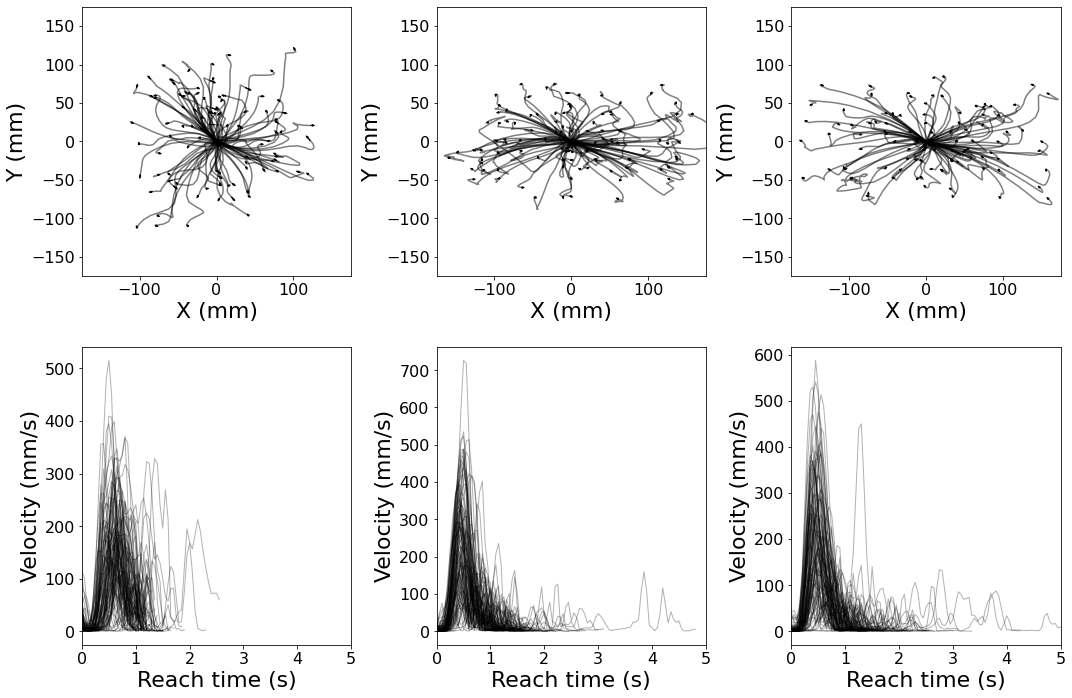

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for ii, data_file in enumerate([dfiles[3], dfiles[1], dfiles[2]]):

    dat = load_sabes(data_file, 50, 0.5, 'none', {}, 100, std_behavior=False)
    dat = reach_segment_sabes(dat, start_times[dfiles[0].split('/')[-1].split('.mat')[0]])

    # Order by low error and long length
    err_ordering = np.argsort(dat['target_pair_error'])
    target_separation = np.array([np.linalg.norm(target[1] - target[0]) for target in dat['target_pairs']])
    length_ordering = np.argsort(target_separation)[::-1]
    long_lowerr_idxs = list(set(err_ordering).intersection(set(length_ordering)))

    n_transitions=min(100, len(long_lowerr_idxs))

    # Re-order by reach error
    err_ordering = np.argsort(dat['target_pair_error'][long_lowerr_idxs])
    long_lowerr_idxs = np.array(long_lowerr_idxs)[err_ordering]

    # xlims = [np.min(dat['target'][:, 0]) - 5, np.max(dat['target'][:, 0]) + 5]
    # ylims = np.array([np.min(dat['target'][:, 1]) - 5, np.max(dat['target'][:, 1]) + 5])

    # valid_target_pairs = dat['target_pairs']
    # transition_times = dat['transition_times']
    vel = dat['vel']
    time = dat['time']

    # # Scater all targets to complete grid
    # for tidx in np.arange(len(valid_target_pairs)):
    #     ax[0].scatter([valid_target_pairs[tidx][0][0], valid_target_pairs[tidx][1][0]], 
    #             [valid_target_pairs[tidx][0][1], valid_target_pairs[tidx][1][1]], color='r')

    transition_times = dat['transition_times']
    for i in range(n_transitions):
        tidx = long_lowerr_idxs[i]

        # trajectory
        try:
            trajectory = dat['behavior'][transition_times[tidx][0]:transition_times[tidx][1]]
        except:
            pdb.set_trace()
        # Center trajectory to the origin
        trajectory -= trajectory[0]

        ax[0, ii].plot(trajectory[:, 0],
                trajectory[:, 1], '-', 
                    markersize=5, color='k', alpha=0.5)
        # Arrow
        ax[0, ii].arrow(trajectory[-1, 0], trajectory[-1, 1], 
                    trajectory[-1, 0] - trajectory[-2, 0], trajectory[-1, 1] - trajectory[-2, 1], 
                    head_width=2, color="k")
        
        t_ = dat['time'][transition_times[tidx][0]:transition_times[tidx][1]]
        t_ -= t_[0]

        vel_ = vel[transition_times[tidx][0]:transition_times[tidx][1], :]/np.diff(t_)[0]
        acc = np.diff(vel[transition_times[tidx][0]:transition_times[tidx][1], :], axis=0)
        
        #t_ = t_[1:] - t_[0]
        
        l1, = ax[1, ii].plot(t_, np.linalg.norm(vel_, axis=1), 'k', alpha=0.3, linewidth=1)

    ax[1, ii].set_ylabel('Velocity (mm/s)', fontsize=22)
    ax[1, ii].set_xlabel('Reach time (s)', fontsize=22)

    ax[0, ii].tick_params(axis='both', which='major', labelsize=16)
    ax[1, ii].tick_params(axis='both', which='major', labelsize=16)
        
    ax[0, ii].set_xlim([-175, 175])
    ax[0, ii].set_ylim([-175, 175])
    ax[0, ii].set_aspect('equal')

    ax[0, ii].set_ylabel('Y (mm)', fontsize=22)
    ax[0, ii].set_xlabel('X (mm)', fontsize=22)

    ax[1, ii].set_xlim([0, 5])

fig.tight_layout()
#fig.subplots_adjust(top=0.95)
fig.savefig('/home/akumar/nse/neural_control/figs/reach_examples/longlowerror.pdf', bbox_inches='tight', pad_inches=0)

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.05s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.36s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:19<00:00, 19.69s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


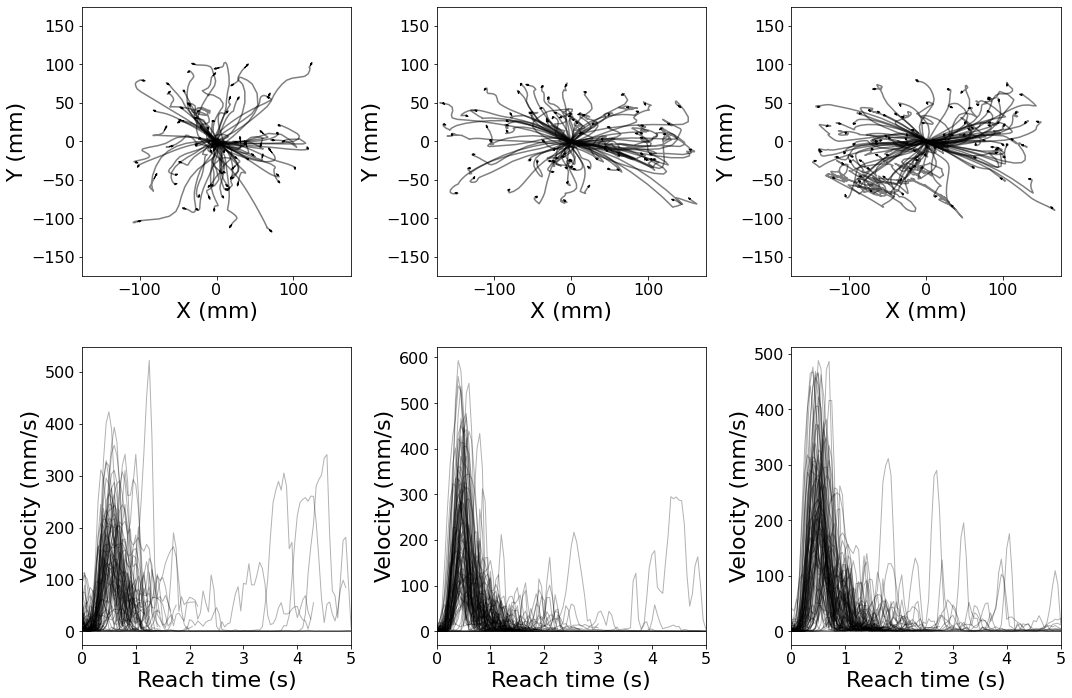

In [56]:
# Examples of unsuccessful reaches
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for ii, data_file in enumerate([dfiles[3], dfiles[1], dfiles[2]]):

    dat = load_sabes(data_file, 50, 0.5, 'none', {}, 100, std_behavior=False)
    dat = reach_segment_sabes(dat, start_times[dfiles[0].split('/')[-1].split('.mat')[0]], keep_high_error=True)

    # Order by high error and long length
    err_ordering = np.argsort(dat['target_pair_error'])[::-1]
    target_separation = np.array([np.linalg.norm(target[1] - target[0]) for target in dat['target_pairs']])
    length_ordering = np.argsort(target_separation)[::-1]
    #long_lowerr_idxs = list(set(err_ordering).intersection(set(length_ordering)))
    long_lowerr_idxs = err_ordering

    n_transitions=min(100, len(long_lowerr_idxs))

    # Re-order by reach error
    err_ordering = np.argsort(dat['target_pair_error'][long_lowerr_idxs])[::-1]
    long_lowerr_idxs = np.array(long_lowerr_idxs)[err_ordering]

    # xlims = [np.min(dat['target'][:, 0]) - 5, np.max(dat['target'][:, 0]) + 5]
    # ylims = np.array([np.min(dat['target'][:, 1]) - 5, np.max(dat['target'][:, 1]) + 5])

    # valid_target_pairs = dat['target_pairs']
    # transition_times = dat['transition_times']
    vel = dat['vel']
    time = dat['time']

    # # Scater all targets to complete grid
    # for tidx in np.arange(len(valid_target_pairs)):
    #     ax[0].scatter([valid_target_pairs[tidx][0][0], valid_target_pairs[tidx][1][0]], 
    #             [valid_target_pairs[tidx][0][1], valid_target_pairs[tidx][1][1]], color='r')

    transition_times = dat['transition_times']
    for i in range(n_transitions):
        tidx = long_lowerr_idxs[i]

        # trajectory
        try:
            trajectory = dat['behavior'][transition_times[tidx][0]:transition_times[tidx][1]]
        except:
            pdb.set_trace()
        # Center trajectory to the origin
        trajectory -= trajectory[0]

        ax[0, ii].plot(trajectory[:, 0],
                trajectory[:, 1], '-', 
                    markersize=5, color='k', alpha=0.5)
        # Arrow
        ax[0, ii].arrow(trajectory[-1, 0], trajectory[-1, 1], 
                    trajectory[-1, 0] - trajectory[-2, 0], trajectory[-1, 1] - trajectory[-2, 1], 
                    head_width=2, color="k")
        
        t_ = dat['time'][transition_times[tidx][0]:transition_times[tidx][1]]
        t_ -= t_[0]

        vel_ = vel[transition_times[tidx][0]:transition_times[tidx][1], :]/np.diff(t_)[0]
        acc = np.diff(vel[transition_times[tidx][0]:transition_times[tidx][1], :], axis=0)
        
        #t_ = t_[1:] - t_[0]
        
        l1, = ax[1, ii].plot(t_, np.linalg.norm(vel_, axis=1), 'k', alpha=0.3, linewidth=1)

    ax[1, ii].set_ylabel('Velocity (mm/s)', fontsize=22)
    ax[1, ii].set_xlabel('Reach time (s)', fontsize=22)

    ax[0, ii].tick_params(axis='both', which='major', labelsize=16)
    ax[1, ii].tick_params(axis='both', which='major', labelsize=16)
        
    ax[0, ii].set_xlim([-175, 175])
    ax[0, ii].set_ylim([-175, 175])
    ax[0, ii].set_aspect('equal')

    ax[0, ii].set_ylabel('Y (mm)', fontsize=22)
    ax[0, ii].set_xlabel('X (mm)', fontsize=22)

    ax[1, ii].set_xlim([0, 5])

fig.tight_layout()
#fig.subplots_adjust(top=0.95)
fig.savefig('/home/akumar/nse/neural_control/figs/reach_examples/higherror.pdf', bbox_inches='tight', pad_inches=0)

In [41]:
# Sort instead by curvature and number of velocity peaks

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.05s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.44s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:20<00:00, 20.19s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


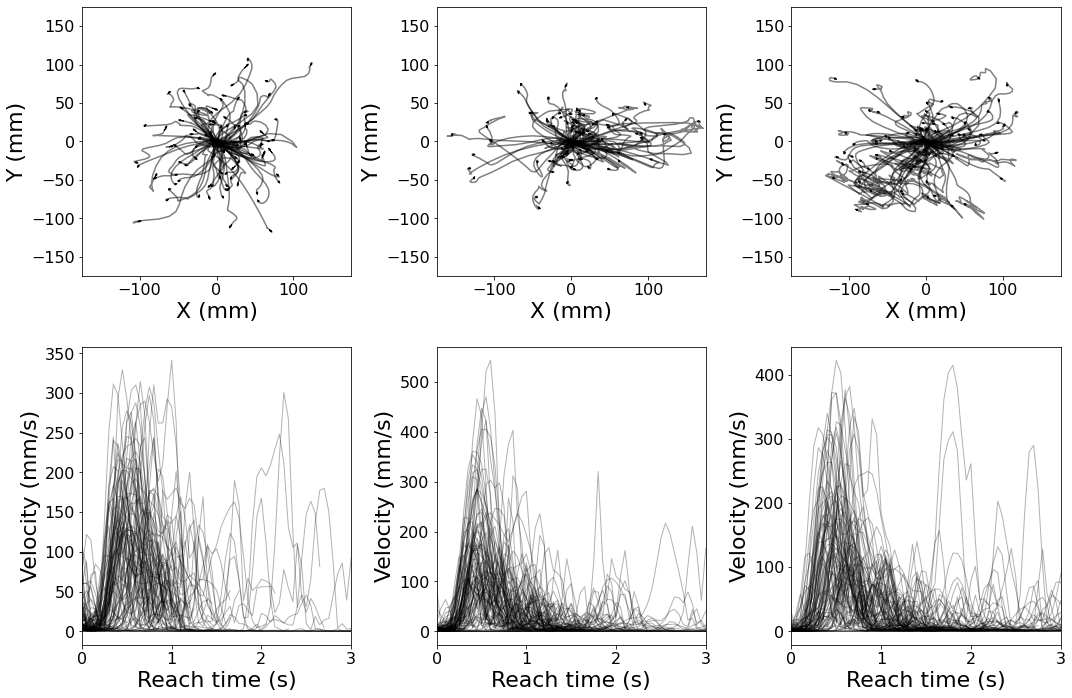

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for ii, data_file in enumerate([dfiles[3], dfiles[1], dfiles[2]]):

    dat = load_sabes(data_file, 50, 0.5, 'none', {}, 100, std_behavior=False)
    dat = reach_segment_sabes(dat, start_times[dfiles[0].split('/')[-1].split('.mat')[0]], keep_high_error=True)

    # Order by high error and long length
    #err_ordering = np.argsort(dat['target_pair_error'])[::-1]
    straightdev_ordering = np.argsort(dat['straight_dev'])[::-1]
    n_transitions=min(100, len(straightdev_ordering))

    # Re-order by reach error
    #err_ordering = np.argsort(dat['target_pair_error'][long_lowerr_idxs])[::-1]
    #long_lowerr_idxs = np.array(long_lowerr_idxs)[err_ordering]

    # xlims = [np.min(dat['target'][:, 0]) - 5, np.max(dat['target'][:, 0]) + 5]
    # ylims = np.array([np.min(dat['target'][:, 1]) - 5, np.max(dat['target'][:, 1]) + 5])

    # valid_target_pairs = dat['target_pairs']
    # transition_times = dat['transition_times']
    vel = dat['vel']
    time = dat['time']

    # # Scater all targets to complete grid
    # for tidx in np.arange(len(valid_target_pairs)):
    #     ax[0].scatter([valid_target_pairs[tidx][0][0], valid_target_pairs[tidx][1][0]], 
    #             [valid_target_pairs[tidx][0][1], valid_target_pairs[tidx][1][1]], color='r')

    transition_times = dat['transition_times']
    for i in range(n_transitions):
        tidx = straightdev_ordering[i]

        # trajectory
        try:
            trajectory = dat['behavior'][transition_times[tidx][0]:transition_times[tidx][1]]
        except:
            pdb.set_trace()
        # Center trajectory to the origin
        trajectory -= trajectory[0]

        ax[0, ii].plot(trajectory[:, 0],
                trajectory[:, 1], '-', 
                    markersize=5, color='k', alpha=0.5)
        # Arrow
        ax[0, ii].arrow(trajectory[-1, 0], trajectory[-1, 1], 
                    trajectory[-1, 0] - trajectory[-2, 0], trajectory[-1, 1] - trajectory[-2, 1], 
                    head_width=2, color="k")
        
        t_ = dat['time'][transition_times[tidx][0]:transition_times[tidx][1]]
        t_ -= t_[0]

        vel_ = vel[transition_times[tidx][0]:transition_times[tidx][1], :]/np.diff(t_)[0]
        acc = np.diff(vel[transition_times[tidx][0]:transition_times[tidx][1], :], axis=0)
        
        #t_ = t_[1:] - t_[0]
        
        l1, = ax[1, ii].plot(t_, np.linalg.norm(vel_, axis=1), 'k', alpha=0.3, linewidth=1)

    ax[1, ii].set_ylabel('Velocity (mm/s)', fontsize=22)
    ax[1, ii].set_xlabel('Reach time (s)', fontsize=22)

    ax[0, ii].tick_params(axis='both', which='major', labelsize=16)
    ax[1, ii].tick_params(axis='both', which='major', labelsize=16)
        
    ax[0, ii].set_xlim([-175, 175])
    ax[0, ii].set_ylim([-175, 175])
    ax[0, ii].set_aspect('equal')

    ax[0, ii].set_ylabel('Y (mm)', fontsize=22)
    ax[0, ii].set_xlabel('X (mm)', fontsize=22)

    ax[1, ii].set_xlim([0, 3])

fig.tight_layout()
fig.savefig('/home/akumar/nse/neural_control/figs/reach_examples/curved.pdf', bbox_inches='tight', pad_inches=0)
#fig.subplots_adjust(top=0.95)
#fig.savefig('hwni/task_example.pdf', bbox_inches='tight', pad_inches=0)

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.08s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.32s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


Processing spikes


100%|██████████| 1/1 [00:20<00:00, 20.16s/it]
../../segmentation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


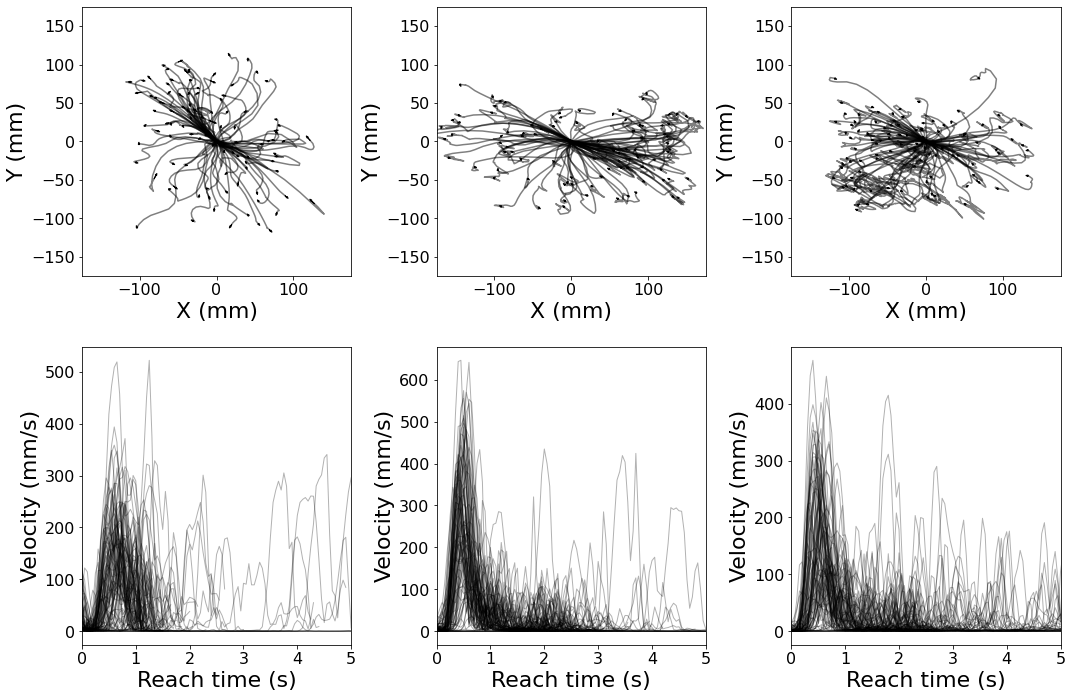

In [59]:
# Now, the number of peaks in the velocity
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for ii, data_file in enumerate([dfiles[3], dfiles[1], dfiles[2]]):

    dat = load_sabes(data_file, 50, 0.5, 'none', {}, 100, std_behavior=False)
    dat = reach_segment_sabes(dat, start_times[dfiles[0].split('/')[-1].split('.mat')[0]], keep_high_error=True)

    # Order by high error and long length
    #err_ordering = np.argsort(dat['target_pair_error'])[::-1]
    peak_ordering = np.argsort(dat['npeaks'])[::-1]
    n_transitions=min(100, len(peak_ordering))

    # Re-order by reach error
    #err_ordering = np.argsort(dat['target_pair_error'][long_lowerr_idxs])[::-1]
    #long_lowerr_idxs = np.array(long_lowerr_idxs)[err_ordering]

    # xlims = [np.min(dat['target'][:, 0]) - 5, np.max(dat['target'][:, 0]) + 5]
    # ylims = np.array([np.min(dat['target'][:, 1]) - 5, np.max(dat['target'][:, 1]) + 5])

    # valid_target_pairs = dat['target_pairs']
    # transition_times = dat['transition_times']
    vel = dat['vel']
    time = dat['time']

    # # Scater all targets to complete grid
    # for tidx in np.arange(len(valid_target_pairs)):
    #     ax[0].scatter([valid_target_pairs[tidx][0][0], valid_target_pairs[tidx][1][0]], 
    #             [valid_target_pairs[tidx][0][1], valid_target_pairs[tidx][1][1]], color='r')

    transition_times = dat['transition_times']
    for i in range(n_transitions):
        tidx = peak_ordering[i]

        # trajectory
        try:
            trajectory = dat['behavior'][transition_times[tidx][0]:transition_times[tidx][1]]
        except:
            pdb.set_trace()
        # Center trajectory to the origin
        trajectory -= trajectory[0]

        ax[0, ii].plot(trajectory[:, 0],
                trajectory[:, 1], '-', 
                    markersize=5, color='k', alpha=0.5)
        # Arrow
        ax[0, ii].arrow(trajectory[-1, 0], trajectory[-1, 1], 
                    trajectory[-1, 0] - trajectory[-2, 0], trajectory[-1, 1] - trajectory[-2, 1], 
                    head_width=2, color="k")
        
        t_ = dat['time'][transition_times[tidx][0]:transition_times[tidx][1]]
        t_ -= t_[0]

        vel_ = vel[transition_times[tidx][0]:transition_times[tidx][1], :]/np.diff(t_)[0]
        acc = np.diff(vel[transition_times[tidx][0]:transition_times[tidx][1], :], axis=0)
        
        #t_ = t_[1:] - t_[0]
        
        l1, = ax[1, ii].plot(t_, np.linalg.norm(vel_, axis=1), 'k', alpha=0.3, linewidth=1)

    ax[1, ii].set_ylabel('Velocity (mm/s)', fontsize=22)
    ax[1, ii].set_xlabel('Reach time (s)', fontsize=22)

    ax[0, ii].tick_params(axis='both', which='major', labelsize=16)
    ax[1, ii].tick_params(axis='both', which='major', labelsize=16)
        
    ax[0, ii].set_xlim([-175, 175])
    ax[0, ii].set_ylim([-175, 175])
    ax[0, ii].set_aspect('equal')

    ax[0, ii].set_ylabel('Y (mm)', fontsize=22)
    ax[0, ii].set_xlabel('X (mm)', fontsize=22)

    ax[1, ii].set_xlim([0, 5])

fig.tight_layout()
fig.savefig('/home/akumar/nse/neural_control/figs/reach_examples/large_npeaks.pdf', bbox_inches='tight', pad_inches=0)
#fig.subplots_adjust(top=0.95)
#fig.savefig('hwni/task_example.pdf', bbox_inches='tight', pad_inches=0)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/home/akumar/nse/neural_control')
from loaders import load_sabes

In [17]:
loco_files = glob.glob('/mnt/Secondary/data/sabes/loco*')

In [49]:
# Get start times for loco
filename = loco_files[9]

# Start times depend on the bin size
dat = load_sabes(filename)

Processing spikes


100%|██████████| 1/1 [00:18<00:00, 18.82s/it]


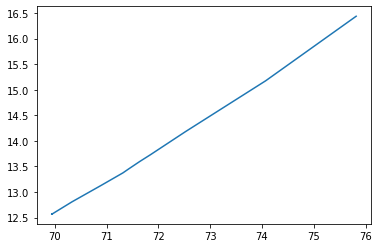

In [51]:
plt.plot(dat['behavior'][0:30, 0], dat['behavior'][0:30, 1])

In [4]:
indy_files = glob.glob('/mnt/Secondary/data/sabes/indy*')

In [5]:
for file in indy_files:
    load_sabes(file, region='S1')

> /home/akumar/nse/neural_control/loaders.py(341)load_sabes()
    339         elif region == 'S1':
    340             pdb.set_trace()
--> 341             indices = S1_indices
    342             print(len(indices))
    343         elif region == 'both':

0
Processing spikes


100%|██████████| 1/1 [00:00<00:00, 20262.34it/s]


> /home/akumar/nse/neural_control/loaders.py(341)load_sabes()
    339         elif region == 'S1':
    340             pdb.set_trace()
--> 341             indices = S1_indices
    342             print(len(indices))
    343         elif region == 'both':



BdbQuit: 